<a href="https://colab.research.google.com/github/Rafazand/MachineL/blob/main/boilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [3]:
# Load required library
# Import Required Library
import cv2
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


*   `numpy` dan `pandas`: Digunakan untuk manipulasi data dan operasi numerik.
*   `fetch_lfw_people`: Digunakan untuk memuat dataset Labeled Faces in the Wild (LFW) dari pustaka `scikit-learn`.
*   `train_test_split`: Untuk membagi dataset menjadi set pelatihan dan pengujian.
*   `SVC`: Algoritma Support Vector Machine dari `scikit-learn` untuk klasifikasi.
*   `confusion_matrix`, `accuracy_score`, `classification_report`: Metrik evaluasi model untuk mengukur performa.
*   `matplotlib.pyplot` dan `seaborn`: Pustaka untuk visualisasi data, seperti menampilkan matriks kebingungan atau plot histogram.

# Load Data

In [4]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True

# Load dataset with conditions
faces = fetch_lfw_people(min_faces_per_person=10, color=True, resize=0.5)  # Optional resize for memory efficiency

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')


Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)




1.   Memuat Dataset LFW

Gunakan fungsi `fetch_lfw_people` dari pustaka `scikit-learn`. Dataset ini secara otomatis akan mengunduh gambar wajah dan label yang terkait.

*   `min_faces_per_person=10`: Memastikan setiap label memiliki minimal 10 gambar (sesuai persyaratan kuis).
*   `color=True`: Memuat gambar dalam format RGB.
*   `resize`: Opsional, digunakan untuk mengubah ukuran gambar agar lebih ringan dan mudah diproses.

2.   Menampilkan informasi dataset

*   Total Label
*   Data Dimension
*   Image Flatten dimension

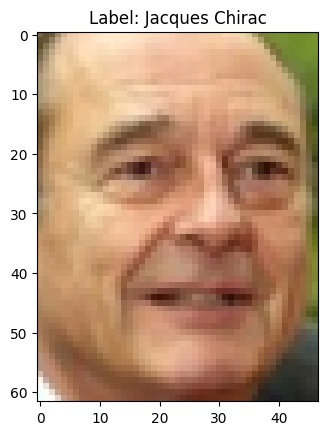

In [5]:
X = faces.images  # Stores the face image to be processed.
y = faces.target  # Stores the labels associated with each image (as Integer).

# Show some images to make sure the dataset has been loaded correctly
plt.imshow(X[0])
plt.title(f"Label: {faces.target_names[y[0]]}")
plt.show()



3.   Ekstraksi Data dan Label:

Pisahkan gambar dan label dari dataset. Gambar-gambar akan digunakan untuk ekstraksi fitur (histogram), sedangkan label akan digunakan untuk melatih model.
*   `X`: Menyimpan gambar wajah yang akan diproses.
*   `y`: Menyimpan label yang berhubungan dengan setiap gambar (target).





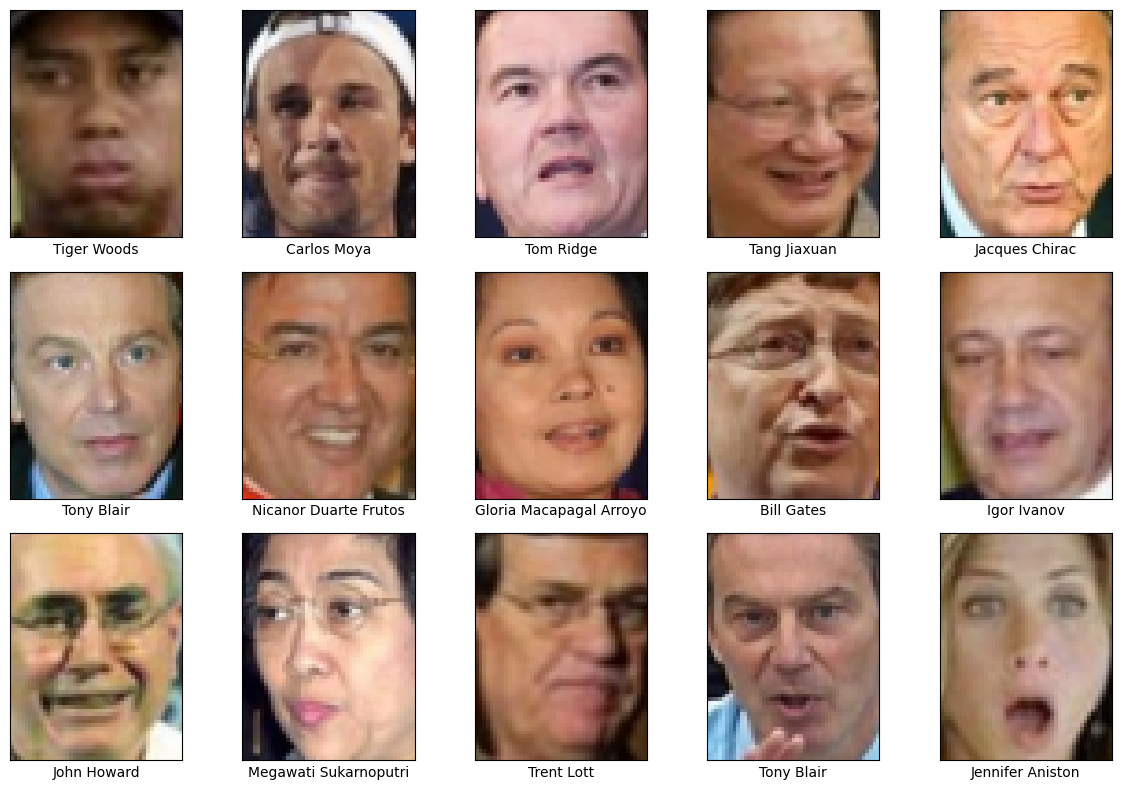

In [6]:
# Check by Plotted Images
# Generate random 15 images

rand_labels = np.random.choice(len(faces.data), 15, replace=False)

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]])  # Default color map for RGB images
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Adjust layout after plotting
fig.tight_layout()


*   `np.random.choice`: Digunakan untuk memilih 15 indeks acak dari dataset tanpa pengulangan (replace=False).
*   `imshow()` tanpa `cmap`: Karena gambar adalah RGB, Anda tidak perlu menggunakan peta warna apa pun.
*   `tight_layout()` di akhir: Dipanggil setelah semua gambar dan label ditambahkan untuk memastikan tampilan tata letak lebih rapi.


**Kesimpulan**

Langkah Load data ini akan:

1.   Memuat dataset LFW dengan minimal 10 gambar per label.
2.   Mengambil gambar dalam format RGB.
3.   Memisahkan gambar dan label untuk proses lebih lanjut.
4.   Memeriksa dan memvisualisasikan data untuk memastikan semuanya berjalan sesuai.

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

## Normalisasi Gambar

In [7]:
# Normalisasi gambar dari rentang [0, 255] ke [0, 1]
X_normalized = X / 255.0


*   **Alasan**: Normalisasi ini bisa membantu model bekerja lebih stabil, terutama ketika menggunakan algoritma seperti SVM yang sensitif terhadap skala data.


# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

In [8]:
# Fungsi untuk mengekstrak histogram dari satu gambar
def extract_histogram(image, bins=(8, 8, 8)):
    # Menghitung histogram untuk setiap channel (R, G, B)
    hist_r = cv2.calcHist([image], [0], None, [bins[0]], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [bins[1]], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [bins[2]], [0, 256])

    # Normalisasi histogram agar nilai berada di rentang [0, 1]
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    # Menggabungkan histogram R, G, dan B menjadi satu vektor fitur
    hist = np.concatenate([hist_r, hist_g, hist_b])

    return hist

# Ekstraksi histogram untuk seluruh dataset
X_hist = np.array([extract_histogram(image) for image in faces.images])

# Memeriksa dimensi hasil ekstraksi fitur histogram
print("Dimensi fitur histogram: ", X_hist.shape)

Dimensi fitur histogram:  (4324, 24)


**Penjelasan Kode:**

1.   `extract_histogram()`:


*   Menggunakan fungsi OpenCV `cv2.calcHist()` untuk menghitung histogram dari setiap channel gambar (Red, Green, dan Blue).
*   Normalisasi dilakukan menggunakan `cv2.normalize()` agar distribusi histogram dapat dibandingkan antar gambar.
*   Histogram dari tiga channel (R, G, B) kemudian digabungkan menjadi satu vektor fitur dengan `np.concatenate()`.

2.   Ekstraksi Histogram dari Dataset:
*   Looping dilakukan untuk seluruh gambar dalam dataset `faces.images` dan histogram diekstrak dari setiap gambar.
3.   Hasil Akhir:
*   Setelah diekstraksi, vektor histogram untuk setiap gambar disimpan di variabel `X_hist`. Dimensi `X_hist` akan menjadi `(n_samples, total_bins)`, di mana `total_bins` adalah jumlah total bins dari ketiga channel histogram yang digabungkan.



# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

In [9]:
# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hist, faces.target, test_size=0.2, random_state=42)

# Step 2: Initialize SVM model (kernel linear atau RBF)
model = SVC(kernel='linear', random_state=42)  # Anda bisa mencoba 'rbf' atau kernel lainnya juga

# Step 3: Train the model with training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model (Accuracy and Classification Report)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mendapatkan label unik dari data yang sebenarnya
unique_labels = np.unique(y_test)

# Cetak laporan klasifikasi dengan parameter 'labels'
print("Classification Report:\n", classification_report(y_test, y_pred, labels=unique_labels, target_names=faces.target_names[unique_labels]))

Accuracy: 0.11445086705202312
Classification Report:
                            precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.00      0.00      0.00        15
    Arnold Schwarzenegger       0.00      0.00      0.00        15
     At

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

In [11]:
# Evaluasi Model pada Data Training
print("Evaluation on Training Data:")

# Prediksi hasil dari data training
y_train_pred = model.predict(X_train)

# Menghitung akurasi untuk data training
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Classification report untuk data training
print("Training Classification Report:\n", classification_report(y_train, y_train_pred, labels=unique_labels, target_names=faces.target_names[unique_labels]))

# Evaluasi Model pada Data Testing
print("\nEvaluation on Testing Data:")

# Prediksi hasil dari data testing
y_test_pred = model.predict(X_test)

# Menghitung akurasi untuk data testing
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Classification report untuk data testing
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred, labels=unique_labels, target_names=faces.target_names[unique_labels]))


Evaluation on Training Data:
Training Accuracy: 0.12460248626770742
Training Classification Report:
                            precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00        14
             Adrien Brody       0.00      0.00      0.00        11
         Alejandro Toledo       0.00      0.00      0.00        37
             Alvaro Uribe       0.00      0.00      0.00        28
          Amelie Mauresmo       0.00      0.00      0.00        15
             Andre Agassi       0.00      0.00      0.00        34
             Andy Roddick       0.00      0.00      0.00        11
           Angelina Jolie       0.00      0.00      0.00        18
              Ann Veneman       0.00      0.00      0.00        10
          Anna Kournikova       0.00      0.00      0.00        11
            Ari Fleischer       0.00      0.00      0.00         9
             Ariel Sharon       0.00      0.00      0.00        62
    Arnold Schwarzenegger  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Testing Accuracy: 0.11445086705202312
Testing Classification Report:
                            precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.00      0.00      0.00        15
    Arnold Schwarzenegger       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix untuk evaluasi tambahan

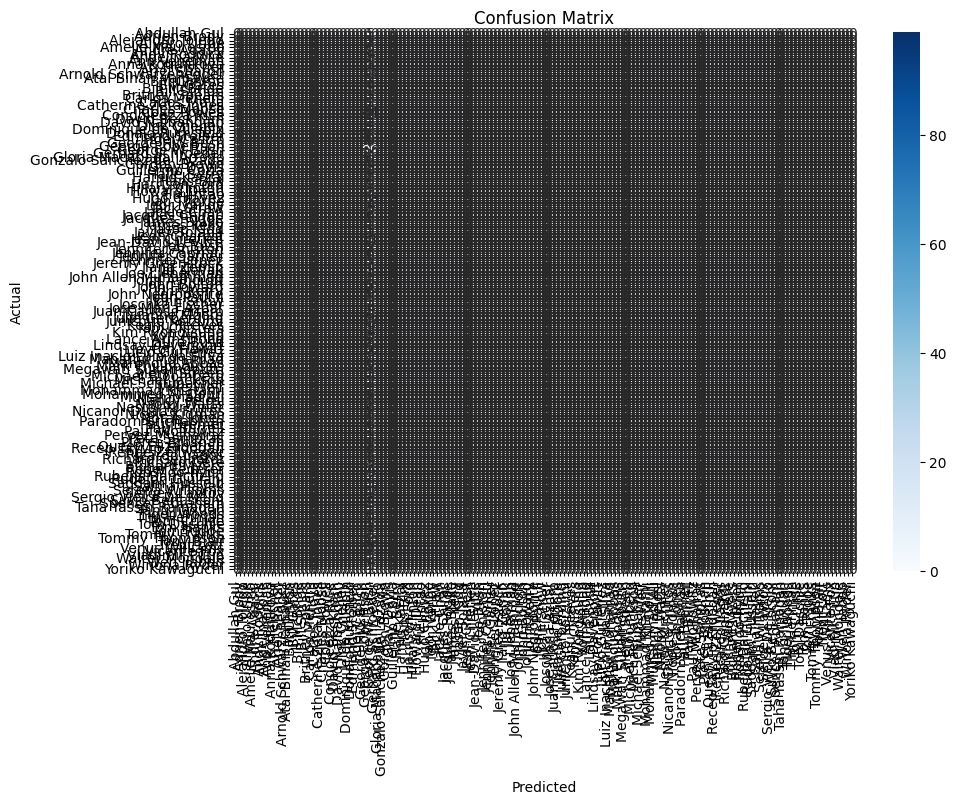

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names[unique_labels], yticklabels=faces.target_names[unique_labels])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()